In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
age_height_df = pd.read_excel('age-height-dataset.xls')

In [4]:
age_height_df.tail()

,Unnamed: 0,Age,Height
66,NaN,76,204
67,NaN,77,205
68,NaN,78,206
69,NaN,79,207
70,NaN,80,208


In [5]:
age_height_df.drop('Unnamed: 0', axis =1, inplace= True)

In [6]:
age_height_df.tail()

,Age,Height
66,76,204
67,77,205
68,78,206
69,79,207
70,80,208


In [7]:
age_height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [8]:
age_height_df.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


In [9]:
age_height_df.isna().sum()

Age       0
Height    0
dtype: int64

In [10]:
x = age_height_df.iloc[:,0:1].values
y = age_height_df.iloc[:, 1].values

In [26]:
cond = np.random.rand(len(age_height_df))
cond

array([0.72987061, 0.47614345, 0.21226008, 0.61147248, 0.63374134,
       0.30476886, 0.1042295 , 0.98216592, 0.23934182, 0.07699651,
       0.03909274, 0.42571075, 0.5780209 , 0.86669288, 0.40091385,
       0.6709142 , 0.93733736, 0.73610933, 0.817867  , 0.58379269,
       0.29701369, 0.9222581 , 0.43739921, 0.84933083, 0.36806507,
       0.05586544, 0.11627636, 0.13210053, 0.3582399 , 0.82805307,
       0.56478525, 0.05949332, 0.84193556, 0.5645201 , 0.60577792,
       0.26983755, 0.59118528, 0.29983587, 0.0053449 , 0.74686671,
       0.44144119, 0.32725324, 0.62292031, 0.80427633, 0.33466415,
       0.92480986, 0.32544249, 0.87519626, 0.23658399, 0.87327881,
       0.45365977, 0.24026409, 0.26165819, 0.54148498, 0.02685925,
       0.46646253, 0.10040068, 0.52519092, 0.05969037, 0.9839442 ,
       0.05016091, 0.25402049, 0.457682  , 0.38920172, 0.73727865,
       0.35700575, 0.23867989, 0.84167111, 0.05241575, 0.52835206,
       0.82284806])

In [27]:
cond>0.2

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True])

In [28]:
cond = np.random.rand(len(age_height_df))>0.2

In [29]:
train = np.where(cond)[0]
train

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 14, 17, 18, 19, 20, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41,
       42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 63,
       64, 65, 66, 67, 68, 69, 70])

In [30]:
valid = np.where(~cond)[0]
valid

array([ 0,  8, 12, 13, 15, 16, 21, 40, 48, 51, 60, 61, 62])

In [31]:
len(train), len(valid)

(58, 13)

In [32]:
train_df = age_height_df.iloc[train]
valid_df = age_height_df.iloc[valid]
len(train_df), len(valid_df)

(58, 13)

In [35]:
train_x = train_df.iloc[:,0:1]
train_y = train_df.iloc[:,1]
valid_x = valid_df.iloc[:,0:1]
valid_y = valid_df.iloc[:,1]

In [33]:
from sklearn.linear_model import LinearRegression

In [37]:
linReg = LinearRegression()
linReg.fit(train_x,train_y)

LinearRegression()

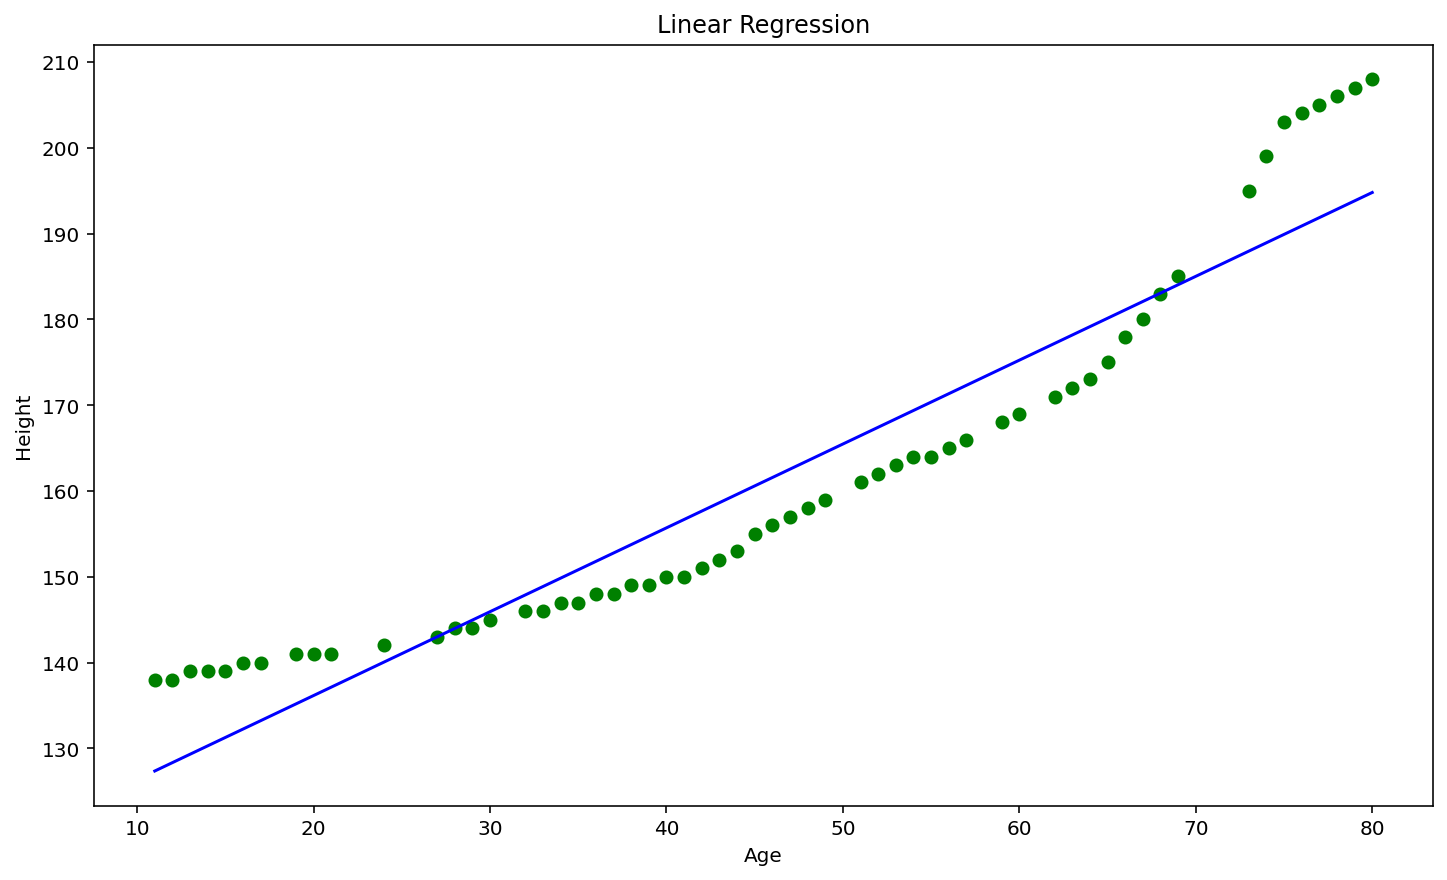

In [40]:
plt.scatter(train_x, train_y, color='green')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.plot(train_x, linReg.predict(train_x), color='blue')
plt.show()

In [52]:
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree =2)
x_polynom = polynom.fit_transform(train_x)
x_polynom

array([[1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 3.300e+01, 1.089e+03],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 3.600e+01, 1.296e+03],
       [1.000e+00, 3.700e+01, 1.369e+03],
       [1.000e+00, 3.800e+01, 1.444e+03],
       [1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 4.000e+01, 1.60

In [53]:
polyReg = LinearRegression()
polyReg.fit(x_polynom, train_y)

LinearRegression()

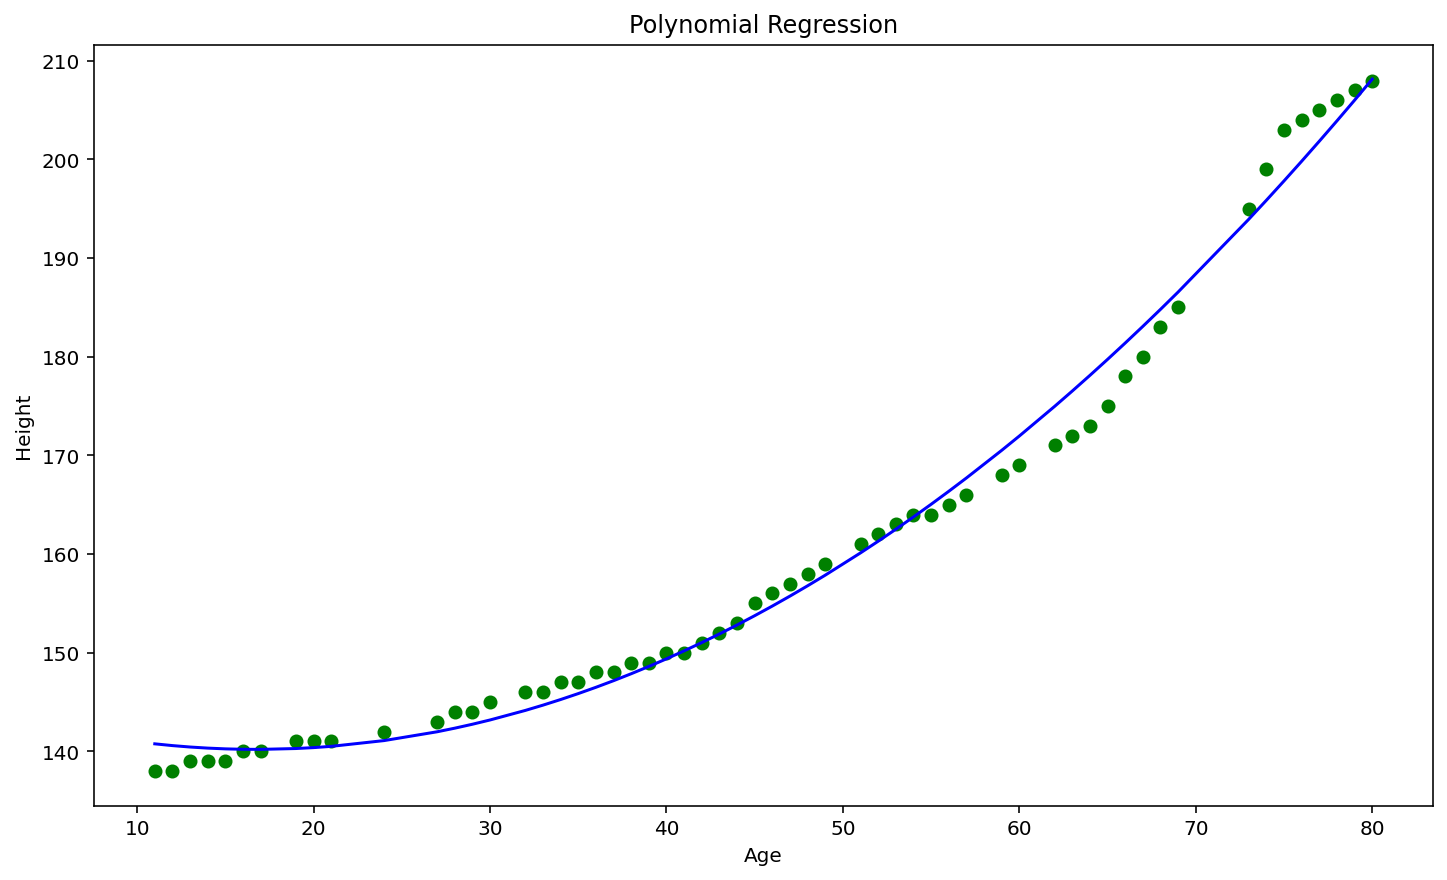

In [54]:
plt.scatter(train_x, train_y, color='green')
plt.plot(train_x, polyReg.predict(x_polynom), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [56]:
y_predict_slr = linReg.predict(valid_x)
from sklearn import metrics
r2_score = metrics.r2_score(valid_y,y_predict_slr)
print('r2 error associated with Linear Regression is :', r2_score)

r2 error associated with Linear Regression is : 0.9292302816225483


In [57]:
y_predict_pr = polyReg.predict(polynom.fit_transform(valid_x))
r2_score = metrics.r2_score(valid_y, y_predict_pr)
print('r2 error associated with Polynomial Regression is :', r2_score)

r2 error associated with Polynomial Regression is : 0.9929684370549816
